# Cluster Analysis and Research Results

## Project Title
**Emotion-Aware Comparative User Segmentation of Indonesian E-Wallet Applications  
Using NLP, Topic Modeling, and Unsupervised Learning**

## Objective
Notebook ini bertujuan untuk:
1. Menganalisis hasil clustering pengguna e-wallet
2. Membentuk profil setiap cluster berdasarkan:
   - Sentimen
   - Emosi
   - Topik
3. Menyajikan hasil penelitian dalam bentuk:
   - Tabel analitis
   - Visualisasi
   - Contoh ulasan representatif

Notebook ini merepresentasikan **hasil akhir penelitian** dan menjadi dasar
penarikan kesimpulan serta pembahasan (Bab IV).


Environment Setup & Library Import

In [2]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Visualization style
sns.set(style="whitegrid", palette="muted")

Mount Google Drive & Define Paths

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
BASE_PATH = "/content/drive/MyDrive/ewallet_nlp_clustering_project"

DATA_PATH = f"{BASE_PATH}/data/processed"
OUTPUT_PATH = f"{BASE_PATH}/outputs"

FINAL_DATA_FILE = f"{DATA_PATH}/final_clustered_e_wallet_reviews.csv"

Load Final Clustered Dataset

In [7]:
df = pd.read_csv(FINAL_DATA_FILE)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (11141, 199)


,review_id,app_name,review_text,clean_text,rating,review_date,app_version,thumbs_up,reviewer_name,sentiment_label,sentiment_score,rating_sentiment,sentiment_mismatch,emotion_label,emotion_score,emotion_anger,emotion_disgust,emotion_fear,emotion_joy,emotion_neutral,emotion_sadness,emotion_surprise,topic_id,topic_prob_0,topic_prob_1,topic_prob_2,topic_prob_3,topic_prob_4,topic_prob_5,topic_prob_6,topic_prob_7,topic_prob_8,topic_prob_9,topic_prob_10,topic_prob_11,topic_prob_12,topic_prob_13,topic_prob_14,topic_prob_15,topic_prob_16,topic_prob_17,topic_prob_18,topic_prob_19,topic_prob_20,topic_prob_21,topic_prob_22,topic_prob_23,topic_prob_24,topic_prob_25,topic_prob_26,...,topic_prob_126,topic_prob_127,topic_prob_128,topic_prob_129,topic_prob_130,topic_prob_131,topic_prob_132,topic_prob_133,topic_prob_134,topic_prob_135,topic_prob_136,topic_prob_137,topic_prob_138,topic_prob_139,topic_prob_140,topic_prob_141,topic_prob_142,topic_prob_143,topic_prob_144,topic_prob_145,topic_prob_146,topic_prob_147,topic_prob_148,topic_prob_149,topic_prob_150,topic_prob_151,topic_prob_152,topic_prob_153,topic_prob_154,topic_prob_155,topic_prob_156,topic_prob_157,topic_prob_158,topic_prob_159,topic_prob_160,topic_prob_161,topic_prob_162,topic_prob_163,topic_prob_164,topic_prob_165,topic_prob_166,topic_prob_167,topic_prob_168,topic_prob_169,topic_prob_170,topic_prob_171,topic_prob_172,topic_prob_173,cluster_kmeans,cluster_agglo
0,2cc12584-7610-41f7-94b7-8d433e258aa3,DANA,woii dana Kenapaa sihh haruss banget gitu kalo...,woii dana kenapaa sihh haruss banget gitu kalo...,1,2026-01-21 17:54:20,2.109.2,0,Sy Pian,negative,0.998985,Negative,True,neutral,0.330701,False,False,False,False,True,False,False,-1,4.327029e-03,2.708171e-03,4.663108e-03,8.133824e-03,5.445007e-03,2.251955e-03,1.944590e-03,2.068939e-03,1.758247e-03,5.220627e-03,3.381818e-03,3.536455e-03,2.780207e-03,2.012771e-03,1.845013e-03,4.463759e-03,2.943007e-03,1.130242e-02,2.456614e-03,3.801904e-03,1.611581e-03,2.939051e-03,2.982349e-03,4.133655e-03,2.847353e-03,2.622577e-03,1.649113e-02,...,4.437525e-03,2.316393e-02,2.037465e-03,1.761975e-03,4.577511e-03,4.964245e-03,2.048113e-03,2.747666e-03,4.085642e-03,2.032619e-03,3.648184e-03,1.392985e-02,1.769238e-02,3.149971e-03,2.008435e-03,5.059270e-03,2.271634e-03,4.911516e-02,3.362224e-03,1.668771e-03,2.335413e-03,2.947665e-03,1.752017e-03,2.018713e-03,3.306719e-03,2.107465e-02,3.035195e-03,2.982798e-03,2.424797e-03,3.347881e-03,4.692291e-03,3.728866e-03,4.884601e-03,1.995796e-03,2.737343e-03,2.959188e-03,1.756193e-03,2.812144e-03,2.220506e-03,4.455913e-03,5.658261e-03,2.892567e-03,1.853312e-03,1.376566e-02,3.040777e-03,4.832690e-02,1.998497e-02,1.529477e-03,0,0
1,e99ad58e-3e2a-494e-8857-82840a07c717,DANA,aplikasi gk bisa dibuka keluar sendiri,aplikasi buka,1,2026-01-21 17:50:48,NaN,0,Tommy Hardiansyah,neutral,0.996702,Negative,True,neutral,0.516435,False,False,False,False,True,False,False,5,6.685447e-04,8.483192e-04,1.198383e-03,5.737578e-04,6.423385e-04,1.529572e-02,4.031717e-04,4.585106e-04,6.436485e-04,4.747784e-04,7.956647e-04,5.229944e-04,8.232729e-04,4.464796e-04,4.984677e-04,5.474339e-04,5.708437e-04,5.550250e-04,7.631598e-04,9.623512e-04,1.481930e-03,4.793407e-04,5.153258e-04,4.992284e-04,4.487124e-04,2.360675e-03,6.362526e-04,...,6.595444e-04,6.118188e-04,4.450364e-04,2.001987e-03,5.849514e-04,8.147988e-04,6.338293e-04,1.544547e-03,1.145367e-03,3.999894e-04,1.087211e-03,6.181281e-04,6.200305e-04,9.526976e-04,4.452344e-04,6.395315e-04,6.377572e-04,5.761286e-04,5.801523e-04,5.341715e-04,2.981080e-03,1.325929e-03,4.812506e-04,4.363586e-04,4.887436e-04,6.254212e-04,4.579133e-04,4.715927e-04,4.726818e-04,1.449879e-03,7.580140e-04,6.242654e-04,7.906535e-04,4.394189e-04,4.556862e-04,7.000199e-04,5.773211e-04,4.883358e-04,1.969118e-03,1.185607e-03,6.593933e-04,4.969634e-04,4.028467e-04,6.724793e-04,9.557644e-04,6.108372e-04,6.514272e-04,5.275909e-04,0,0
2,e66455aa-0f34-4eee-8409-133a7c612e8b,DANA,tolong di perbaiki sistem aplikasi dana nya .....,t

Data Structure & Sanity Check

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11141 entries, 0 to 11140
Columns: 199 entries, review_id to cluster_agglo
dtypes: bool(8), float64(176), int64(5), object(10)
memory usage: 16.3+ MB


In [9]:
df.isna().sum()

,0
review_id,0
app_name,0
review_text,0
clean_text,0
rating,0
...,...
topic_prob_171,0
topic_prob_172,0
topic_prob_173,0
cluster_kmeans,0


Cluster Distribution Analysis

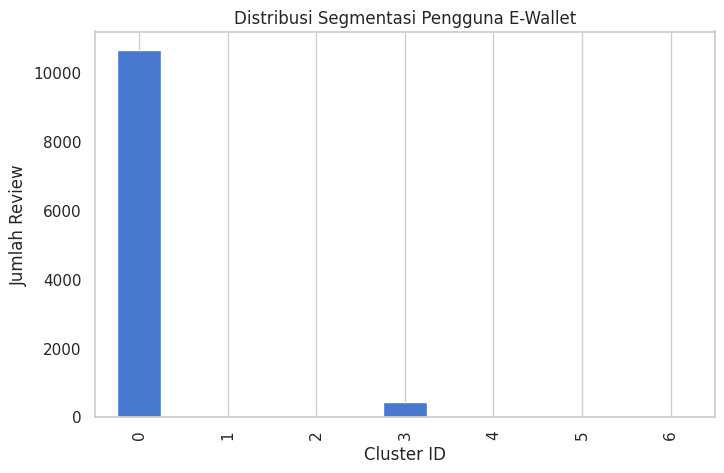

In [10]:
cluster_counts = df["cluster_kmeans"].value_counts().sort_index()

plt.figure(figsize=(8,5))
cluster_counts.plot(kind="bar")
plt.title("Distribusi Segmentasi Pengguna E-Wallet")
plt.xlabel("Cluster ID")
plt.ylabel("Jumlah Review")
plt.grid(axis="y")
plt.show()

Selection of Numerical Features for Profiling

In [11]:
numeric_features = df.select_dtypes(
    include=["int64", "float64", "bool"]
).columns.tolist()

numeric_features.remove("cluster_kmeans")

print(f"Total numerical features used for profiling: {len(numeric_features)}")
numeric_features[:10]

Total numerical features used for profiling: 188


['rating',
 'thumbs_up',
 'sentiment_score',
 'sentiment_mismatch',
 'emotion_score',
 'emotion_anger',
 'emotion_disgust',
 'emotion_fear',
 'emotion_joy',
 'emotion_neutral']

Cluster Profiling (Core Research Output)

In [12]:
cluster_profile = (
    df.groupby("cluster_kmeans")[numeric_features]
    .mean()
    .round(4)
)

cluster_profile

,rating,thumbs_up,sentiment_score,sentiment_mismatch,emotion_score,emotion_anger,emotion_disgust,emotion_fear,emotion_joy,emotion_neutral,emotion_sadness,emotion_surprise,topic_id,topic_prob_0,topic_prob_1,topic_prob_2,topic_prob_3,topic_prob_4,topic_prob_5,topic_prob_6,topic_prob_7,topic_prob_8,topic_prob_9,topic_prob_10,topic_prob_11,topic_prob_12,topic_prob_13,topic_prob_14,topic_prob_15,topic_prob_16,topic_prob_17,topic_prob_18,topic_prob_19,topic_prob_20,topic_prob_21,topic_prob_22,topic_prob_23,topic_prob_24,topic_prob_25,topic_prob_26,topic_prob_27,topic_prob_28,topic_prob_29,topic_prob_30,topic_prob_31,topic_prob_32,topic_prob_33,topic_prob_34,topic_prob_35,topic_prob_36,...,topic_prob_125,topic_prob_126,topic_prob_127,topic_prob_128,topic_prob_129,topic_prob_130,topic_prob_131,topic_prob_132,topic_prob_133,topic_prob_134,topic_prob_135,topic_prob_136,topic_prob_137,topic_prob_138,topic_prob_139,topic_prob_140,topic_prob_141,topic_prob_142,topic_prob_143,topic_prob_144,topic_prob_145,topic_prob_146,topic_prob_147,topic_prob_148,topic_prob_149,topic_prob_150,topic_prob_151,topic_prob_152,topic_prob_153,topic_prob_154,topic_prob_155,topic_prob_156,topic_prob_157,topic_prob_158,topic_prob_159,topic_prob_160,topic_prob_161,topic_prob_162,topic_prob_163,topic_prob_164,topic_prob_165,topic_prob_166,topic_prob_167,topic_prob_168,topic_prob_169,topic_prob_170,topic_prob_171,topic_prob_172,topic_prob_173,cluster_agglo
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.5275,1.0232,0.9438,1.0,0.7109,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,29.4453,0.0125,0.0093,0.0083,0.0058,0.0064,0.0038,0.0063,0.0070,0.0055,0.0053,0.0041,0.0036,0.0039,0.0047,0.0057,0.0041,0.0036,0.0042,0.0032,0.0054,0.0035,0.0043,0.0038,0.0033,0.0037,0.0040,0.0058,0.0033,0.0037,0.0040,0.0038,0.0034,0.0030,0.0035,0.0037,0.0041,0.0036,...,0.0038,0.0029,0.0040,0.0027,0.0027,0.0036,0.0038,0.0027,0.0034,0.0039,0.0029,0.0037,0.0038,0.0042,0.0033,0.0027,0.0031,0.0028,0.0039,0.0035,0.0030,0.0028,0.0025,0.0026,0.0027,0.0033,0.0040,0.0036,0.0034,0.0030,0.0039,0.0037,0.0034,0.0027,0.0028,0.0035,0.0030,0.0031,0.0030,0.0029,0.0040,0.0032,0.0032,0.0028,0.0041,0.0034,0.0042,0.0042,0.0037,0.0204
1,1.1818,0.3636,0.9707,1.0,0.6890,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,147.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,4.8571,0.0714,0.9959,1.0,0.6931,0.0000,0.2143,0.0000,0.0000,0.7857,0.0000,0.0000,70.0000,0.0003,0.0002,0.0002,0.0002,0.0002,0.0002,0.0013,0.0012,0.0003,0.0003,0.0002,0.0004,0.0002,0.0009,0.0005,0.0004,0.0005,0.0002,0.0003,0.0002,0.0002,0.0006,0.0005,0.0004,0.0006,0.0002,0.0002,0.0002,0.0002,0.0004,0.0002,0.0002,0.0005,0.0008,0.0002,0.0002,0.0003,...,0.0002,0.0002,0.0003,0.0006,0.0002,0.0003,0.0002,0.0003,0.0002,0.0002,0.0015,0.0002,0.0002,0.0002,0.0002,0.0011,0.0002,0.0004,0.0002,0.0005,0.0003,0.0002,0.0002,0.0006,0.0016,0.0004,0.0002,0.0005,0.0005,0.0012,0.0002,0.0002,0.0003,0.0002,0.0009,0.0006,0.0003,0.0003,0.0006,0.0002,0.0002,0.0002,0.0005,0.0014,0.0002,0.0002,0.0002,0.0002,0.0003,2.0000
3,2.2651,2.7566,0.9339,1.0,0.5356,0.0289,0.0289,0.1253,0.4313,0.0000,0.3398,0.0458,31.1928,0.0170,0.0090,0.0038,0.0026,0.0038,0.0016,0.0214,0.0052,0.0100,0.0049,0.0027,0.0054,0.0037,0.0021,0.0029,0.0073,0.0073,0.0027,0.0021,0.0054,0.0013,0.0032,0.0025,0.0025,0.0032,0.0044,0.0050,0.0018,0.0022,0.0029,0.0024,0.0037,0.0015,0.0025,0

Sentiment Comparison Across Clusters

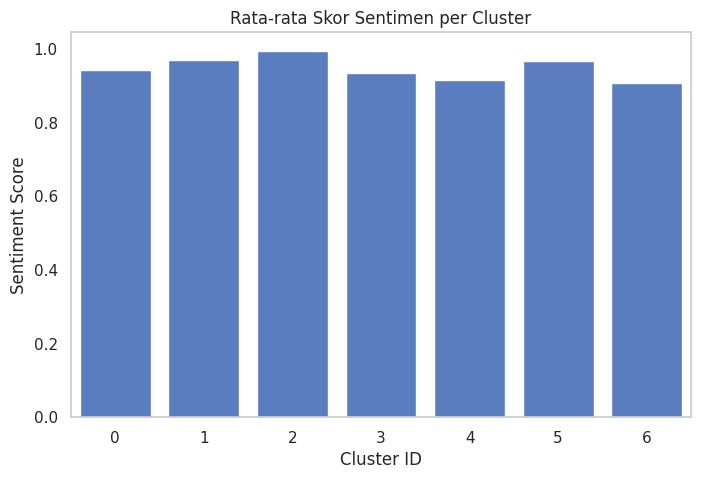

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=cluster_profile.index,
    y=cluster_profile["sentiment_score"]
)
plt.title("Rata-rata Skor Sentimen per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Sentiment Score")
plt.grid(axis="y")
plt.show()

Emotion Distribution Analysis

In [15]:
# Kolom emosi numerik (score & one-hot)
emotion_numeric_cols = [
    c for c in df.columns
    if c.startswith("emotion_") and df[c].dtype != "object"
]

# Kolom label emosi (kategorikal)
emotion_label_col = "emotion_label"

emotion_numeric_cols

['emotion_score',
 'emotion_anger',
 'emotion_disgust',
 'emotion_fear',
 'emotion_joy',
 'emotion_neutral',
 'emotion_sadness',
 'emotion_surprise']

In [16]:
emotion_profile = (
    df.groupby("cluster_kmeans")[emotion_numeric_cols]
    .mean()
    .round(4)
)

emotion_profile

,emotion_score,emotion_anger,emotion_disgust,emotion_fear,emotion_joy,emotion_neutral,emotion_sadness,emotion_surprise
cluster_kmeans,,,,,,,,
0,0.7109,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.6890,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.6931,0.0000,0.2143,0.0000,0.0000,0.7857,0.0000,0.0000
3,0.5356,0.0289,0.0289,0.1253,0.4313,0.0000,0.3398,0.0458
4,0.7284,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.5886,0.0000,0.0000,0.0000,0.1000,0.9000,0.0000,0.0000
6,0.7776,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


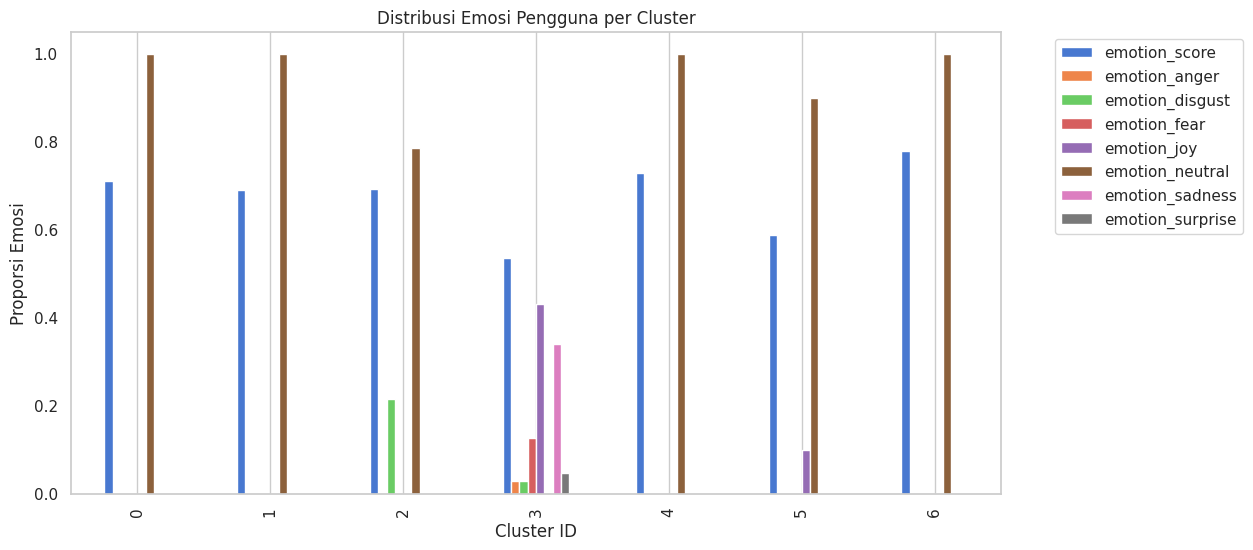

In [17]:
emotion_profile.plot(
    kind="bar",
    figsize=(12,6)
)

plt.title("Distribusi Emosi Pengguna per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Proporsi Emosi")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(axis="y")
plt.show()

Dominant Topic Identification per Cluster

In [18]:
dominant_topic_per_cluster = (
    df.groupby("cluster_kmeans")["topic_id"]
    .value_counts()
    .groupby(level=0)
    .idxmax()
    .apply(lambda x: x[1])
)

dominant_topic_per_cluster

,count
cluster_kmeans,
0,-1
1,147
2,70
3,-1
4,11
5,158
6,91


Representative Review Sampling (Qualitative Validation)

In [21]:
[col for col in df.columns if "review" in col.lower()]


['review_id', 'review_text', 'review_date', 'reviewer_name']

In [22]:
# Kandidat kolom teks yang umum di NLP pipeline
TEXT_COLUMN_CANDIDATES = [
    "review_clean",
    "review_processed",
    "clean_text",
    "review_text",
    "review_preprocessed"
]

TEXT_COL = None
for col in TEXT_COLUMN_CANDIDATES:
    if col in df.columns:
        TEXT_COL = col
        break

if TEXT_COL is None:
    raise ValueError("❌ Tidak ditemukan kolom teks ulasan pada dataset.")

print(f"✅ Kolom teks yang digunakan: {TEXT_COL}")

✅ Kolom teks yang digunakan: clean_text


In [23]:
def show_sample_reviews(df, cluster_id, text_col, n=3):
    cluster_df = df[df["cluster_kmeans"] == cluster_id]

    if len(cluster_df) == 0:
        print(f"\n===== CLUSTER {cluster_id} (NO DATA) =====")
        return

    samples = cluster_df.sample(
        min(n, len(cluster_df)),
        random_state=42
    )

    print(f"\n===== CLUSTER {cluster_id} =====")
    for _, row in samples.iterrows():
        print("-", str(row[text_col])[:300], "...")

In [24]:
for c in sorted(df["cluster_kmeans"].unique()):
    show_sample_reviews(df, c, TEXT_COL)


===== CLUSTER 0 =====
- kuatir blablalalallala bayar qris nungguin ganggu bawa ewallet mudah nyusahin ...
- bagus promosi ...
- ovo paylater gak dipake ya kak asa bayar gak sampe masuk tenggang ...

===== CLUSTER 1 =====
- akun aplikasi guna mending uninstall brow ...
- aplikasi uninstall pake dana cicil udah bayar lunas aja cicil kecewa banget x itu udah lunasin biar bintang bicara ...
- kecewa dg tunggu uninstall aja pake aplikasi belah ...

===== CLUSTER 2 =====
- nyaman n mudah ...
- nyaman tuk tranportasi dada ...
- aman nyaman ...

===== CLUSTER 3 =====
- transaksi gagal saldo tetep kurang tuju gak sampe samasekali aneh transaksi gak perincianaktivitaskecewaa ...
- sulit buka salah alesan sinyal tdk kuat sinyal bagus tolong baik donk klo tdk sy tdk pake ...
- potong nya sadiiss aplikasibeda sm gop ...

===== CLUSTER 4 =====
- sangangat bagua ...
- ramah jemput ...
- gopay rborder nambah cash rbharus tunai males pake gojek ...

===== CLUSTER 5 =====
- cs nya parah respon jelas tr

Export Research Outputs

In [25]:
cluster_profile.to_csv(
    f"{OUTPUT_PATH}/cluster_profile_summary.csv"
)

In [26]:
df.to_csv(
    f"{OUTPUT_PATH}/final_results_with_clusters.csv",
    index=False
)

## Summary of Findings

1. Pengguna e-wallet di Indonesia dapat disegmentasikan ke dalam beberapa cluster
   berdasarkan sentimen, emosi, dan topik ulasan.
2. Setiap cluster menunjukkan karakteristik emosi dan topik yang berbeda.
3. Segmentasi ini dapat dimanfaatkan oleh perusahaan e-wallet untuk:
   - Peningkatan layanan
   - Strategi retensi pengguna
   - Identifikasi pain points utama